<a href="https://colab.research.google.com/github/A-THAKUR22/AprilAssignments/blob/main/Assignment10April12.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Stock Price Prediction using Machine Learning

In [484]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

In [485]:
Tesla_stocks=pd.read_csv('TSLA (2).csv')
Tesla_stocks

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-06-29,19.000000,25.000000,17.540001,23.889999,23.889999,18766300
1,2010-06-30,25.790001,30.420000,23.299999,23.830000,23.830000,17187100
2,2010-07-01,25.000000,25.920000,20.270000,21.959999,21.959999,8218800
3,2010-07-02,23.000000,23.100000,18.709999,19.200001,19.200001,5139800
4,2010-07-06,20.000000,20.000000,15.830000,16.110001,16.110001,6866900
...,...,...,...,...,...,...,...
2411,2020-01-28,568.489990,576.809998,558.080017,566.900024,566.900024,11788500
2412,2020-01-29,575.690002,589.799988,567.429993,580.989990,580.989990,17801500
2413,2020-01-30,632.419983,650.880005,618.000000,640.809998,640.809998,29005700
2414,2020-01-31,640.000000,653.000000,632.520020,650.570007,650.570007,15719300


In [486]:
Tesla_stocks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2416 entries, 0 to 2415
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2416 non-null   object 
 1   Open       2416 non-null   float64
 2   High       2416 non-null   float64
 3   Low        2416 non-null   float64
 4   Close      2416 non-null   float64
 5   Adj Close  2416 non-null   float64
 6   Volume     2416 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 132.2+ KB


In [487]:
Tesla_stocks.describe()

,Open,High,Low,Close,Adj Close,Volume
count,2416.000000,2416.000000,2416.000000,2416.000000,2416.000000,2.416000e+03
mean,186.271147,189.578224,182.916639,186.403651,186.403651,5.572722e+06
std,118.740163,120.892329,116.857591,119.136020,119.136020,4.987809e+06
min,16.139999,16.629999,14.980000,15.800000,15.800000,1.185000e+05
25%,34.342498,34.897501,33.587501,34.400002,34.400002,1.899275e+06
50%,213.035004,216.745002,208.870002,212.960007,212.960007,4.578400e+06
75%,266.450012,270.927513,262.102501,266.774994,266.774994,7.361150e+06
max,673.690002,786.140015,673.520020,780.000000,780.000000,4.706500e+07


In [488]:
Tesla_stocks['Date']=pd.to_datetime(Tesla_stocks['Date'])
Tesla_stocks

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-06-29,19.000000,25.000000,17.540001,23.889999,23.889999,18766300
1,2010-06-30,25.790001,30.420000,23.299999,23.830000,23.830000,17187100
2,2010-07-01,25.000000,25.920000,20.270000,21.959999,21.959999,8218800
3,2010-07-02,23.000000,23.100000,18.709999,19.200001,19.200001,5139800
4,2010-07-06,20.000000,20.000000,15.830000,16.110001,16.110001,6866900
...,...,...,...,...,...,...,...
2411,2020-01-28,568.489990,576.809998,558.080017,566.900024,566.900024,11788500
2412,2020-01-29,575.690002,589.799988,567.429993,580.989990,580.989990,17801500
2413,2020-01-30,632.419983,650.880005,618.000000,640.809998,640.809998,29005700
2414,2020-01-31,640.000000,653.000000,632.520020,650.570007,650.570007,15719300


In [489]:
Tesla_stocks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2416 entries, 0 to 2415
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       2416 non-null   datetime64[ns]
 1   Open       2416 non-null   float64       
 2   High       2416 non-null   float64       
 3   Low        2416 non-null   float64       
 4   Close      2416 non-null   float64       
 5   Adj Close  2416 non-null   float64       
 6   Volume     2416 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 132.2 KB


<Axes: xlabel='Date', ylabel='Open'>

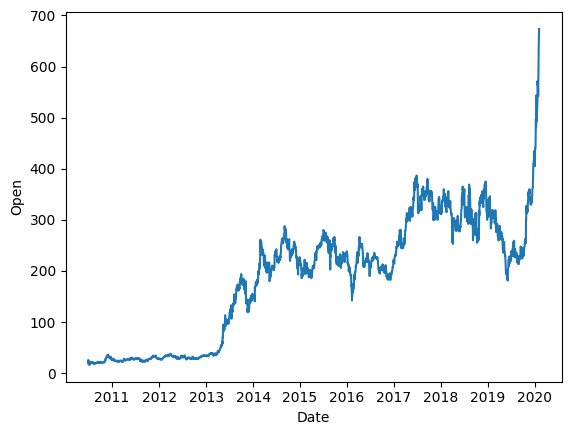

In [490]:
sns.lineplot(x='Date',y='Open',data=Tesla_stocks)

<Axes: xlabel='Date', ylabel='High'>

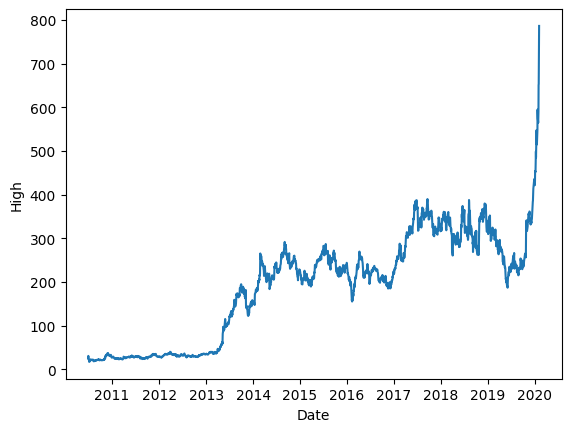

In [491]:
sns.lineplot(x='Date',y='High',data=Tesla_stocks)

<Axes: xlabel='Date', ylabel='Low'>

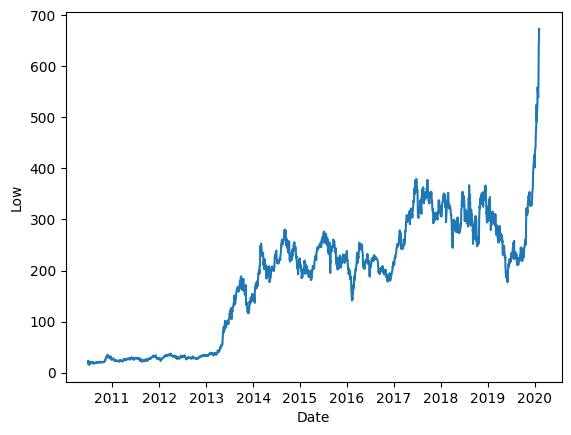

In [492]:
sns.lineplot(x='Date',y='Low',data=Tesla_stocks)

<Axes: xlabel='Date', ylabel='Close'>

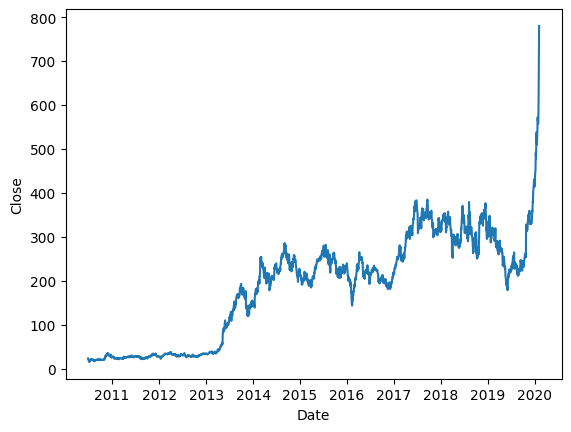

In [493]:
sns.lineplot(x='Date',y='Close',data=Tesla_stocks)

<Axes: >

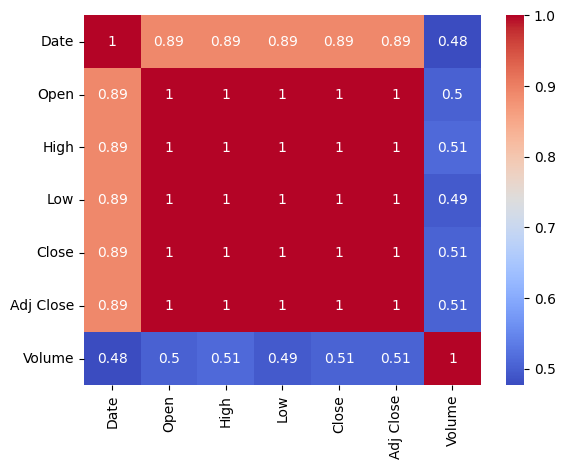

In [494]:
correlation=Tesla_stocks.corr()
sns.heatmap(correlation,annot=True,cmap='coolwarm')

In [495]:
correlation

,Date,Open,High,Low,Close,Adj Close,Volume
Date,1.000000,0.891110,0.890536,0.890960,0.890294,0.890294,0.477066
Open,0.891110,1.000000,0.999425,0.999575,0.998886,0.998886,0.501762
High,0.890536,0.999425,1.000000,0.999389,0.999640,0.999640,0.512944
Low,0.890960,0.999575,0.999389,1.000000,0.999447,0.999447,0.493496
Close,0.890294,0.998886,0.999640,0.999447,1.000000,1.000000,0.505169
Adj Close,0.890294,0.998886,0.999640,0.999447,1.000000,1.000000,0.505169
Volume,0.477066,0.501762,0.512944,0.493496,0.505169,0.505169,1.000000


In [496]:
X=Tesla_stocks.drop(columns=['Date','Close'],axis=1)
y=Tesla_stocks['Close']

In [497]:
X

,Open,High,Low,Adj Close,Volume
0,19.000000,25.000000,17.540001,23.889999,18766300
1,25.790001,30.420000,23.299999,23.830000,17187100
2,25.000000,25.920000,20.270000,21.959999,8218800
3,23.000000,23.100000,18.709999,19.200001,5139800
4,20.000000,20.000000,15.830000,16.110001,6866900
...,...,...,...,...,...
2411,568.489990,576.809998,558.080017,566.900024,11788500
2412,575.690002,589.799988,567.429993,580.989990,17801500
2413,632.419983,650.880005,618.000000,640.809998,29005700
2414,640.000000,653.000000,632.520020,650.570007,15719300


In [498]:
y

0        23.889999
1        23.830000
2        21.959999
3        19.200001
4        16.110001
           ...    
2411    566.900024
2412    580.989990
2413    640.809998
2414    650.570007
2415    780.000000
Name: Close, Length: 2416, dtype: float64

In [499]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

model=RandomForestRegressor(max_depth=20, min_samples_leaf=1, min_samples_split=2, n_estimators=200)

model.fit(X_train_scaled,y_train)


RandomForestRegressor(max_depth=20, n_estimators=200)

In [500]:
y_predictions=model.predict(X_test_scaled)
print(f'Predictions: {y_predictions}')

Predictions: [ 31.4981501   24.6521997  279.73919718 327.96514932 259.25549855
 380.93659689  29.12829968 208.3110014  224.85134727 314.85350069
  34.41160076 362.32364937  26.23079975 423.85080405 308.80814968
  30.32104995 188.66649889 233.25545057 362.53429475  97.52145066
 314.96460443 294.02489358 219.57100017  23.11904991 382.58889704
  28.15179942  28.24595021 210.10779938 233.96750114 226.31330029
 252.30904831  20.24034952 260.87950045 219.60584901 641.33740451
 210.05879965 212.92575148 215.5000507  295.13020582  34.07089997
 147.79654931 236.9152505  315.39864604  24.94985022 228.34175286
 300.23554148  32.57020092 147.97850059 227.12094713  39.20329961
 222.53615186  33.24204984  37.32780057 359.21969856 196.46244884
  37.82529985  33.80760036 222.59700216 232.48775046  27.3910999
 289.10279616 152.272901    32.99084995 339.60840156 317.26435214
 242.59064795 247.6758013  331.18810276 250.67109772 219.45734942
 327.95090024  34.95979985 268.41350523  31.60685051  28.9461999

In [501]:
MSE=mean_squared_error(y_test,y_predictions)
print(f'Mean Squared Error: {MSE}')

Mean Squared Error: 1.1056888354406043


In [502]:
R2Score=r2_score(y_test,y_predictions)
print(f'R2 Score: {R2Score}')

R2 Score: 0.9999272273036349


In [503]:
rmse=np.sqrt(MSE)
print(f'Root Mean Squared Error: {rmse}')

Root Mean Squared Error: 1.0515173966419216
